In [38]:
import pandas as pd
import requests
import json

# URL del archivo JSON en formato RAW
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Extraer los datos
response = requests.get(url)
data = response.json()

# Convertir a DataFrame
df = pd.json_normalize(data)

print("Datos cargados exitosamente. A continuacion se muestran las primeras 5 filas:")
df.head()

Datos cargados exitosamente. Primeras 5 filas:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [36]:
# 1. Eliminar duplicados
df = df.drop_duplicates()

# 2. Verificación de valores nulos
print("Valores nulos por columna:\n", df.isnull().sum())

# Ejemplo de limpieza: Si 'Churn' es categórico 'Yes'/'No', convertir a 1/0
if 'Churn' in df.columns:
    # Convertir 'Yes' a 1 y 'No' a 0
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 3. Eliminar filas con nulos críticos o rellenarlos
df = df.dropna(subset=['customerID'])

print("\nLimpieza básica completada. Dimensiones actuales:", df.shape)

Valores nulos por columna:
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Limpieza básica completada. Dimensiones actuales: (7043, 21)


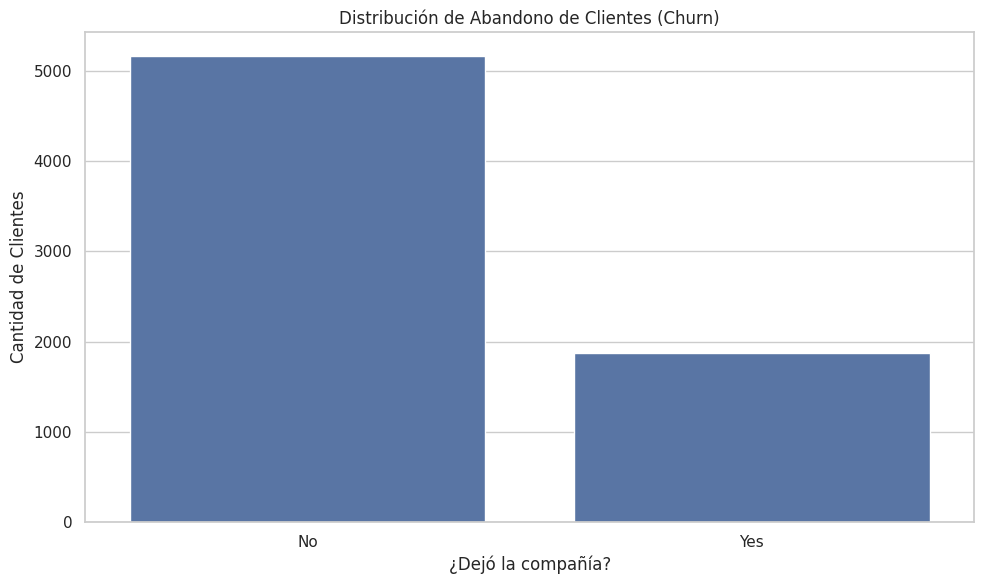

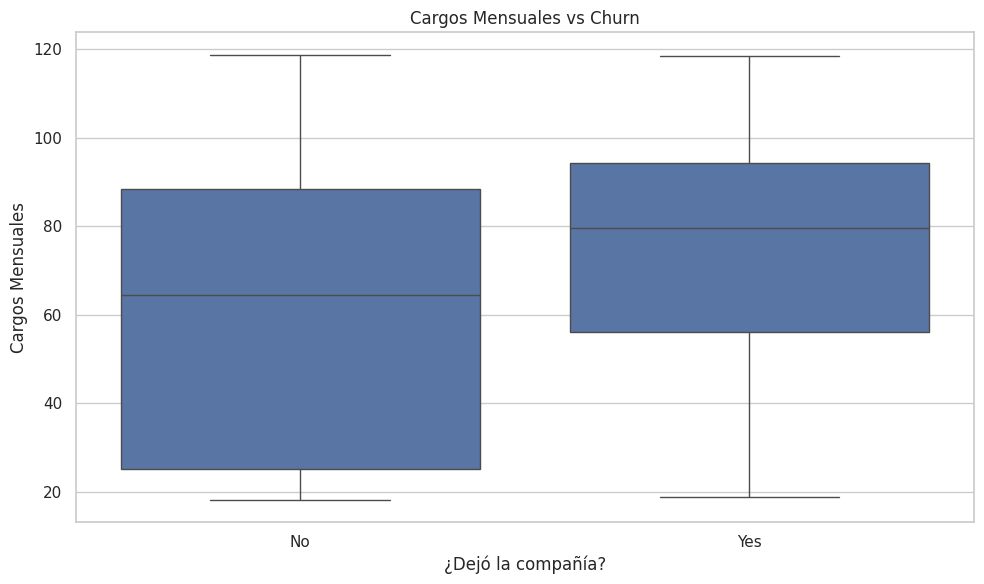

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Asegurar tipo categórico correcto (YES / NO)
df['Churn'] = df['Churn'].astype('category')

# Orden correcto según los valores reales
orden_churn = ['No', 'Yes']

# ===== Gráfico 1: Distribución de Churn =====
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='Churn',
    order=orden_churn
)
plt.title('Distribución de Abandono de Clientes (Churn)')
plt.xlabel('¿Dejó la compañía?')
plt.ylabel('Cantidad de Clientes')
plt.tight_layout()
plt.show()

# ===== Gráfico 2: Cargos Mensuales vs Churn =====
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Churn',
    y='account.Charges.Monthly',
    order=orden_churn
)
plt.title('Cargos Mensuales vs Churn')
plt.xlabel('¿Dejó la compañía?')
plt.ylabel('Cargos Mensuales')
plt.tight_layout()
plt.show()

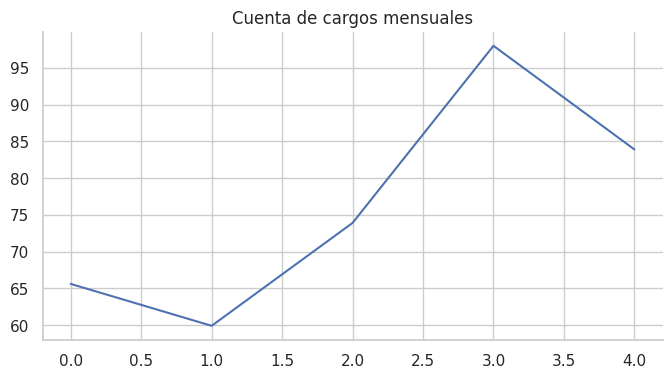

In [16]:
from matplotlib import pyplot as plt
_df_15['account.Charges.Monthly'].plot(kind='line', figsize=(8, 4), title='Cuenta de cargos mensuales')
plt.gca().spines[['top', 'right']].set_visible(False)